<a href="https://colab.research.google.com/github/d-hackmt/Fundamentalss-of-Deep-Learning/blob/main/Deep_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recognize Hand written Digits using Neural networks

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras 
import numpy as np

How do you feed images to neuron

In [ ]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

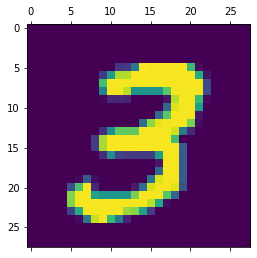

In [ ]:
plt.matshow(X_train[7])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Converting x train into 1d array
Flatten

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

Scalling our values for better accuracy since all our values are between 0(black) - 255(white)    

In [ ]:
X_train = X_train / 255 
X_test = X_test /255 

In [ ]:
X_train_flattened = X_train.reshape(len(X_train) , 28 * 28)
X_test_flattened = X_test.reshape(len(X_test) , 28 * 28)

In [ ]:
X_train_flattened.shape , X_test_flattened.shape

((60000, 784), (10000, 784))

Creating a simple neural network

In [ ]:
model = keras.Sequential([
     keras.layers.Dense( 10 , input_shape= (784,) , activation = 'sigmoid')
 ]) 

model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',               #because we have categories in output and sparse is our output is int number
    metrics =['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1884 - accuracy: 0.5881
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9777 - accuracy: 0.7014
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7913 - accuracy: 0.7399
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6276 - accuracy: 0.7597
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4847 - accuracy: 0.7744
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3608 - accuracy: 0.7887
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2539 - accuracy: 0.7979
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1619 - accuracy: 0.8072
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0825 - accuracy: 0.8151
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.014

In [ ]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.9637 - accuracy: 0.8374


[0.963657021522522, 0.8374000191688538]

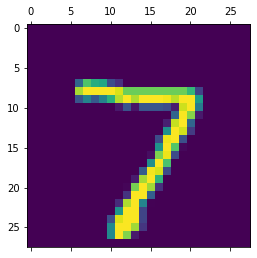

In [ ]:
plt.matshow(X_test[0])

In [ ]:
ypred = model.predict(X_test_flattened)
ypred[1]

313/313 [==============================] - 0s 1ms/step


array([0.30046448, 0.28645268, 0.7154473 , 0.5580235 , 0.06442075,
       0.45165724, 0.561715  , 0.03844903, 0.33314615, 0.06126868],
      dtype=float32)

In [ ]:
np.argmax(ypred[1])          # it will find max value fromm array for our prediction

2

In [ ]:
y_test[:5]                       #now these are int values and ypred is whole nos , we need to convert it into concrete class labels

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
ypredlabels = [np.argmax(i) for i in ypred]      #create a new array out of existing array using for loop
ypredlabels[:5]

[7, 2, 1, 0, 4]

So now my y is able to predict so good because my values are scalled

CONFUSION MATRIX USING TF

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=ypredlabels)             #labels is truth data and predictions is predictions
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 927,    1,    5,    7,    0,    7,   25,    1,    7,    0],
       [   0, 1097,    9,    3,    0,    2,    5,    0,   19,    0],
       [  17,   52,  822,   26,   19,    0,   31,   23,   41,    1],
       [   4,   26,   29,  873,    1,    7,    8,   21,   30,   11],
       [   2,   21,    3,    0,  823,    0,   26,    5,    7,   95],
       [  27,   67,    7,  134,   28,  541,   25,   24,   18,   21],
       [  21,   33,   11,    0,   15,   15,  861,    0,    2,    0],
       [   1,   55,   16,    2,   12,    0,    2,  899,    9,   32],
       [  18,   63,   11,   74,   14,   12,   17,   18,  720,   27],
       [  19,   25,    6,   11,   64,    3,    1,   59,   10,  811]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

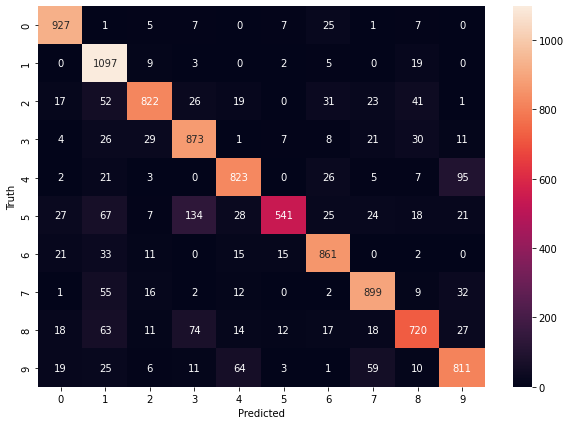

In [ ]:
#seaborn for better visualization

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

LETS ADD HIDDEN LAYERS TO OUR MODEL to impove the accuracy

In [ ]:
model = keras.Sequential([
     keras.layers.Dense( 100 , input_shape= (784,) , activation = 'relu'),              #those 100 and 10 are layers of neurons
     keras.layers.Dense( 10 , input_shape= (784,) , activation = 'sigmoid')
 ]) 

model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',               #because we have categories in output and sparse is our output is int number
    metrics =['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2840 - accuracy: 0.6857
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5477 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4165 - accuracy: 0.8880
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.9047
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3207 - accuracy: 0.9085
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3073 - accuracy: 0.9118
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.9154
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2874 - accuracy: 0.9175
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.279

In [ ]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2706 - accuracy: 0.9225


[0.2706303894519806, 0.9225000143051147]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

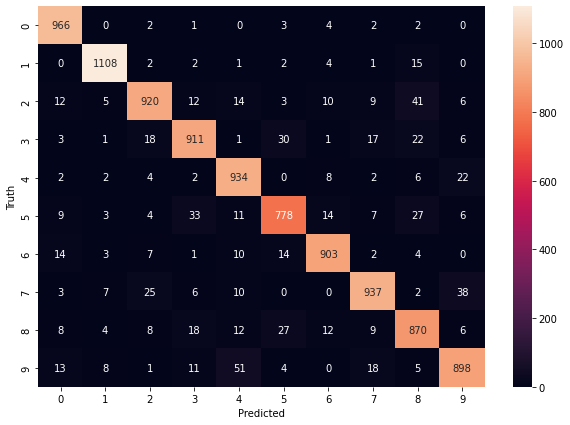

In [ ]:
#seaborn for better visualization

ypred = model.predict(X_test_flattened)
ypredlabels = [np.argmax(i) for i in ypred] 
cm = tf.math.confusion_matrix(labels=y_test , predictions=ypredlabels)    


plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

NOw we are using X_train_flattend again and again
for this keras has a flatten function

In [ ]:
model = keras.Sequential([
     keras.layers.flatten(input_shape = (28,28)),
     keras.layers.Dense( 100 , input_shape= (784,) , activation = 'relu'),              #those 100 and 10 are layers of neurons
     keras.layers.Dense( 10 , input_shape= (784,) , activation = 'sigmoid')
 ]) 

model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',               #because we have categories in output and sparse is our output is int number
    metrics =['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 10)
